In [193]:
#importing the needed libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
#reading/opening the csv file so work can be done on it
tweetsDf= pd.read_csv('Tweets.csv')

In [195]:
#shows all the columns in the data pre pre data cleaning
tweetsDf.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [196]:
#shows the first five rows of the untouched data
tweetsDf.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


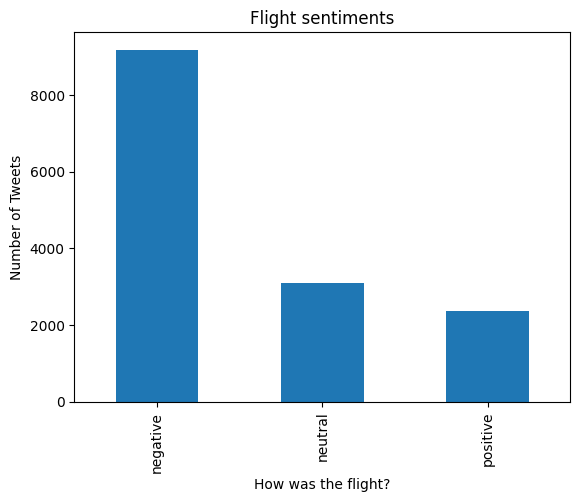

In [197]:
#We are now filtering the data and selecting the 'airline_sentiment' columns and getting the unique counts for each sentiment
negativeReason = tweetsDf['airline_sentiment'].value_counts()
#plotting the histogram
negativeReason.plot(kind='bar')
#Giving it a title
plt.title('Flight sentiments')
#label for the x-axis
plt.xlabel('How was the flight?')
#label for the y axis
plt.ylabel('Number of Tweets')
#Showing the plotted graph
plt.show()

In [198]:
#selecting ONLY the negative sentiments by airline
tweetsDf=tweetsDf[tweetsDf['airline_sentiment']== 'negative']

<Figure size 2000x4000 with 0 Axes>

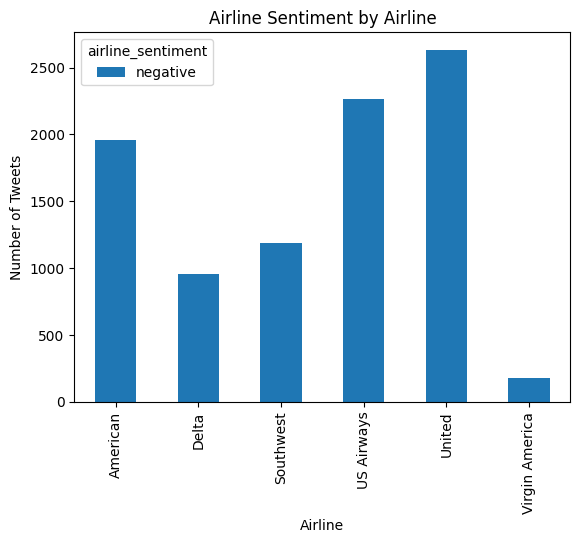

In [199]:
#grouping the alines and their sentiments and t and visualizing them
grouped = tweetsDf.groupby(['airline', 'airline_sentiment']).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=True)
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.show()

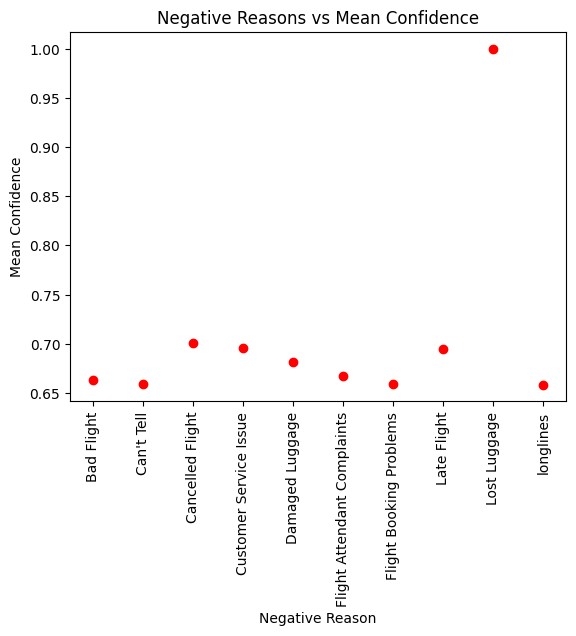

In [200]:
# group data by negative reason and compute median confidence
grouped_data = tweetsDf.groupby('negativereason')['negativereason_confidence'].median()

# create scatter plot
plt.scatter(grouped_data.index, grouped_data, c='red')
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('Mean Confidence')
plt.title('Negative Reasons vs Mean Confidence')
plt.show()

In [201]:
tweetsDf = tweetsDf.drop('airline_sentiment_gold', axis =1)
tweetsDf = tweetsDf.drop('name', axis =1)
tweetsDf = tweetsDf.drop('negativereason_gold', axis =1)
tweetsDf = tweetsDf.drop('retweet_count', axis =1)
tweetsDf = tweetsDf.drop('text', axis =1)
tweetsDf = tweetsDf.drop('tweet_coord', axis =1)
tweetsDf = tweetsDf.drop('tweet_created', axis =1)
tweetsDf = tweetsDf.drop('tweet_location', axis =1)
tweetsDf = tweetsDf.drop('user_timezone', axis =1)
tweetsDf = tweetsDf.drop('tweet_id', axis =1)

In [202]:
# Create a boolean mask to filter rows where the 'negativereason' column contains "Bad Flight"
mask1 = tweetsDf['negativereason'].str.contains("Bad Flight", na=False)

# Count and print the number of rows that will be dropped
print(len(tweetsDf[mask1]), 'rows dropped')

# Drop the rows from the DataFrame using the `drop` method and the `index` attribute of the filtered DataFrame
tweetsDf = tweetsDf.drop(tweetsDf[mask1].index)

580 rows dropped


In [203]:
mask2 = tweetsDf['negativereason'].str.contains("Can't Tell", na=False)
print(len(tweetsDf[mask2]), 'rows dropped')
tweetsDf = tweetsDf.drop(tweetsDf[mask2].index)

1190 rows dropped


In [204]:
tweetsDf.head(10)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline
15,negative,0.6842,Late Flight,0.3684,Virgin America
24,negative,1.0000,Customer Service Issue,0.3557,Virgin America
25,negative,1.0000,Customer Service Issue,1.0000,Virgin America
30,negative,1.0000,Flight Booking Problems,1.0000,Virgin America
32,negative,1.0000,Customer Service Issue,1.0000,Virgin America
33,negative,1.0000,Customer Service Issue,1.0000,Virgin America
39,negative,1.0000,Customer Service Issue,1.0000,Virgin America
41,negative,0.6688,Flight Booking Problems,0.6688,Virgin America
55,negative,0.6939,Flight Booking Problems,0.6939,Virgin America
61,negative,1.0000,Customer Service Issue,1.0000,Virgin America


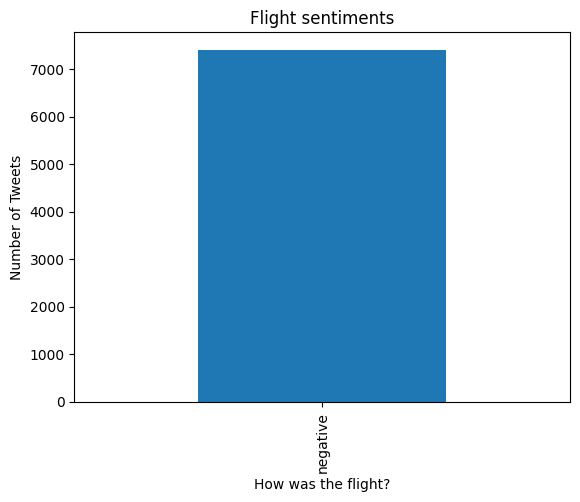

In [205]:
#We are now filtering the data and selecting the 'airline_sentiment' columns and getting the unique counts for each sentiment
negativeReason = tweetsDf['airline_sentiment'].value_counts()
#plotting the histogram
negativeReason.plot(kind='bar')
#Giving it a title
plt.title('Flight sentiments')
#label for the x-axis
plt.xlabel('How was the flight?')
#label for the y axis
plt.ylabel('Number of Tweets')
#Showing the plotted graph
plt.show()

In [206]:
#selecting ONLY the negative sentiments by airline
tweetsDf=tweetsDf[tweetsDf['airline_sentiment']== 'negative']

<Figure size 2000x4000 with 0 Axes>

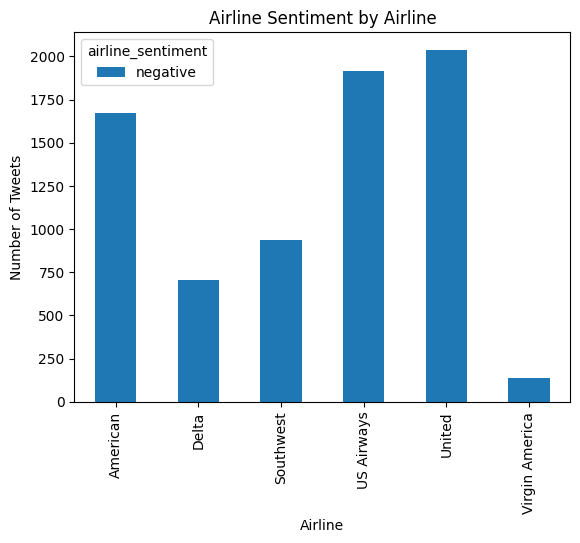

In [207]:
#grouping the alines and their sentiments and t and visualizing them
grouped = tweetsDf.groupby(['airline', 'airline_sentiment']).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=True)
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.show()

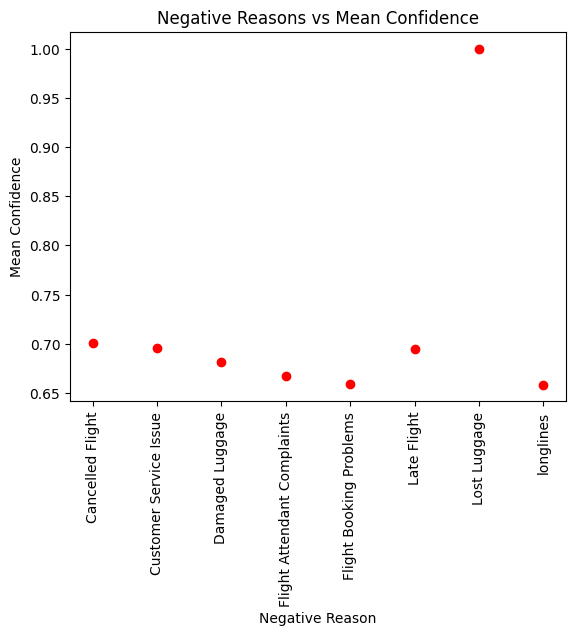

In [208]:
# group data by negative reason and compute median confidence
grouped_data = tweetsDf.groupby('negativereason')['negativereason_confidence'].median()

# create scatter plot
plt.scatter(grouped_data.index, grouped_data, c='red')
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('Mean Confidence')
plt.title('Negative Reasons vs Mean Confidence')
plt.show()

In [209]:
print(tweetsDf.isnull().sum())

# Check for empty spaces
for col in tweetsDf.columns:
    if tweetsDf[col].dtype == object:
        print(f"{col}: {tweetsDf[col].str.isspace().sum()}")

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
dtype: int64
airline_sentiment: 0
negativereason: 0
airline: 0


In [210]:
bin = [0, 0.2, 0.4, 0.6, 0.9, 1]

tweetsDf['Airline_Conf_Bucket']= pd.cut(tweetsDf['airline_sentiment_confidence'], bin)

print('Airline_Conf_Bucket:\n',(tweetsDf['Airline_Conf_Bucket']).head())

Airline_Conf_Bucket:
 15    (0.6, 0.9]
24    (0.9, 1.0]
25    (0.9, 1.0]
30    (0.9, 1.0]
32    (0.9, 1.0]
Name: Airline_Conf_Bucket, dtype: category
Categories (5, interval[float64, right]): [(0.0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.9] < (0.9, 1.0]]


In [211]:
bin = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

tweetsDf['NegReason_Conf_Bucket']= pd.cut(tweetsDf['negativereason_confidence'], bin)

print('NegReason_Conf_Bucket:\n',(tweetsDf['NegReason_Conf_Bucket']).head())

NegReason_Conf_Bucket:
 15    (0.3, 0.4]
24    (0.3, 0.4]
25    (0.9, 1.0]
30    (0.9, 1.0]
32    (0.9, 1.0]
Name: NegReason_Conf_Bucket, dtype: category
Categories (10, interval[float64, right]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]


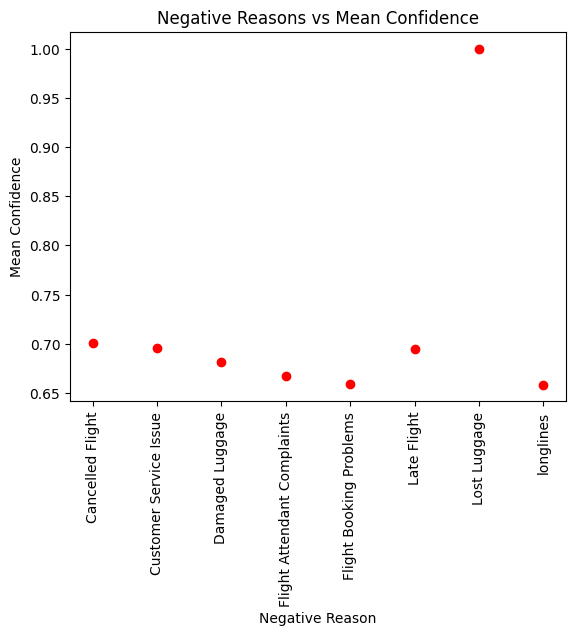

In [212]:
# group data by negative reason and compute median confidence(Post Col drops)
grouped_data = tweetsDf.groupby('negativereason')['negativereason_confidence'].median()

# create scatter plot
plt.scatter(grouped_data.index, grouped_data, c='red')
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('Mean Confidence')
plt.title('Negative Reasons vs Mean Confidence')
plt.show()

<Figure size 2000x4000 with 0 Axes>

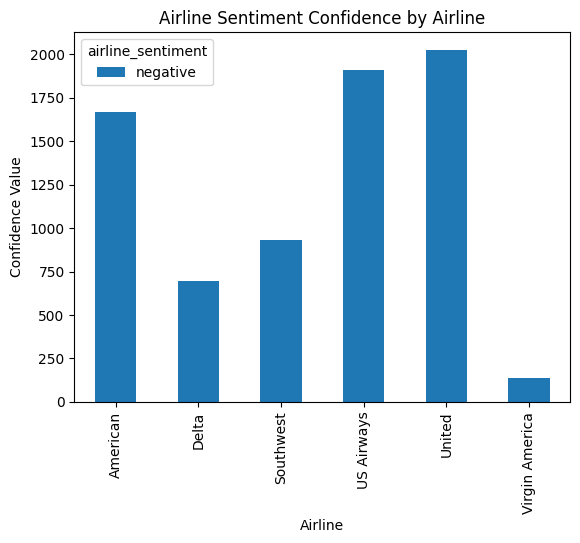

In [213]:
tweetsDf=tweetsDf[tweetsDf['airline_sentiment_confidence'] > .5]
grouped= tweetsDf.groupby(['airline','airline_sentiment' ]).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=False,)
plt.title('Airline Sentiment Confidence by Airline')
plt.xlabel('Airline')
plt.ylabel('Confidence Value')
plt.show()

<Figure size 2000x4000 with 0 Axes>

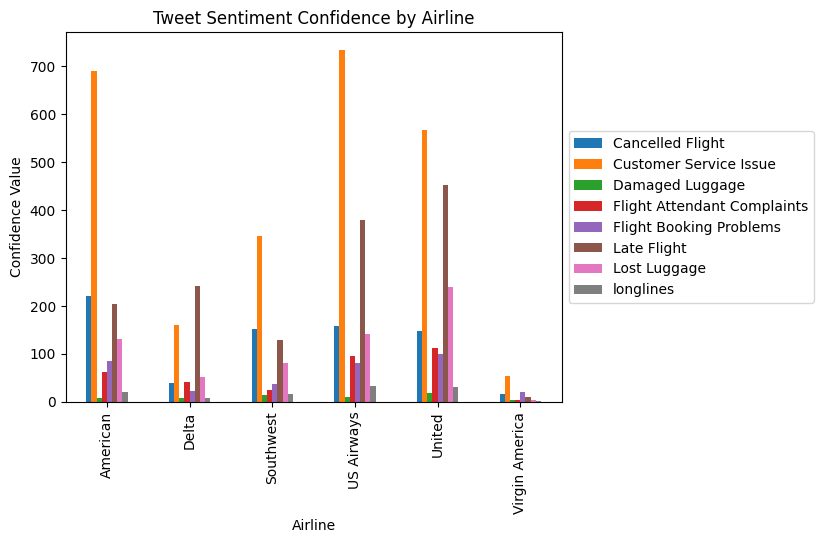

In [214]:
tweetsDf=tweetsDf[tweetsDf['negativereason_confidence'] > .5]
grouped= tweetsDf.groupby(['airline','negativereason' ]).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.title('Tweet Sentiment Confidence by Airline')
plt.xlabel('Airline')
plt.ylabel('Confidence Value')
plt.show()

4. start presentation work
5.go straight into alg (TBD)

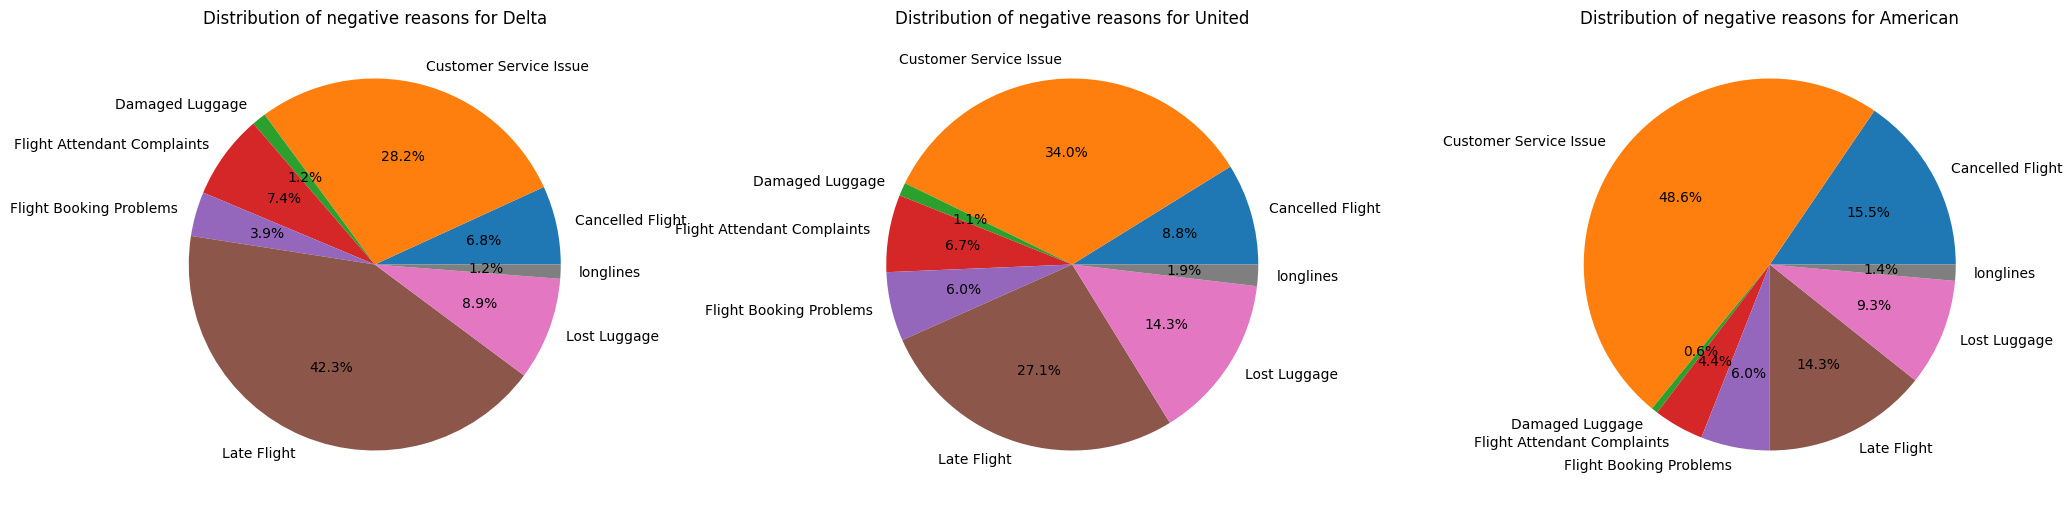

In [215]:
# filter dataframe to only include rows with specific airlines
airlines = ['Delta', 'United', 'American']
filtered_df = tweetsDf[tweetsDf['airline'].isin(airlines)]

# create a figure with one subplot for each airline
fig, axs = plt.subplots(1, len(airlines), figsize=(8 * len(airlines), 8))

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)

# create a pie chart for each airline
for i, airline in enumerate(airlines):
    # filter data for the current airline
    airline_data = filtered_df[filtered_df['airline'] == airline]
    
    # group by negativereason
    grouped_data = airline_data.groupby('negativereason').size()
    
    # plot pie chart
    axs[i].pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
    axs[i].set_title(f'Distribution of negative reasons for {airline}')

plt.show()

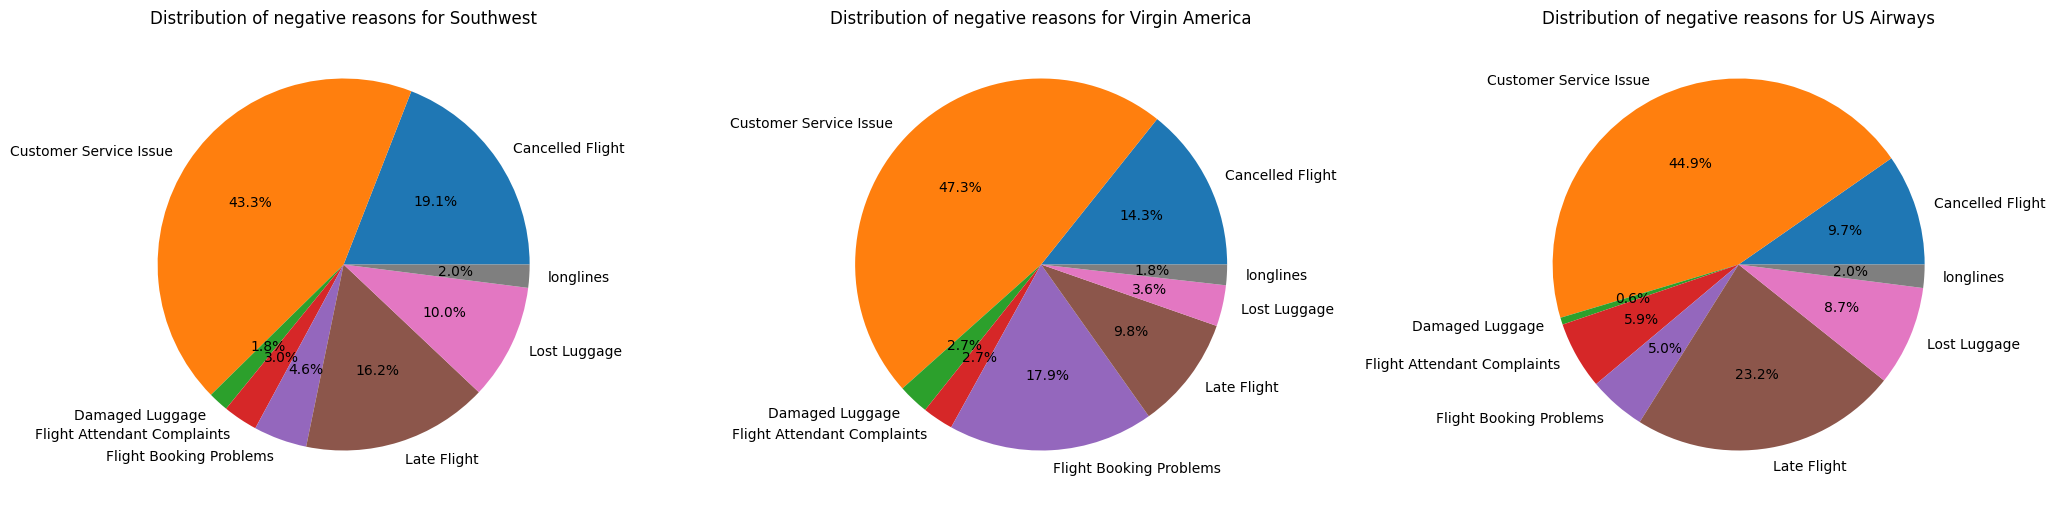

In [216]:
# filter dataframe to only include rows with specific airlines
airlines = ['Southwest', 'Virgin America', 'US Airways']
filtered_df = tweetsDf[tweetsDf['airline'].isin(airlines)]

# create a figure with one subplot for each airline
fig, axs = plt.subplots(1, len(airlines), figsize=(8 * len(airlines), 8))

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)

# create a pie chart for each airline
for i, airline in enumerate(airlines):
    # filter data for the current airline
    airline_data = filtered_df[filtered_df['airline'] == airline]
    
    # group by negativereason
    grouped_data = airline_data.groupby('negativereason').size()
    
    # plot pie chart
    axs[i].pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
    axs[i].set_title(f'Distribution of negative reasons for {airline}')

plt.show()

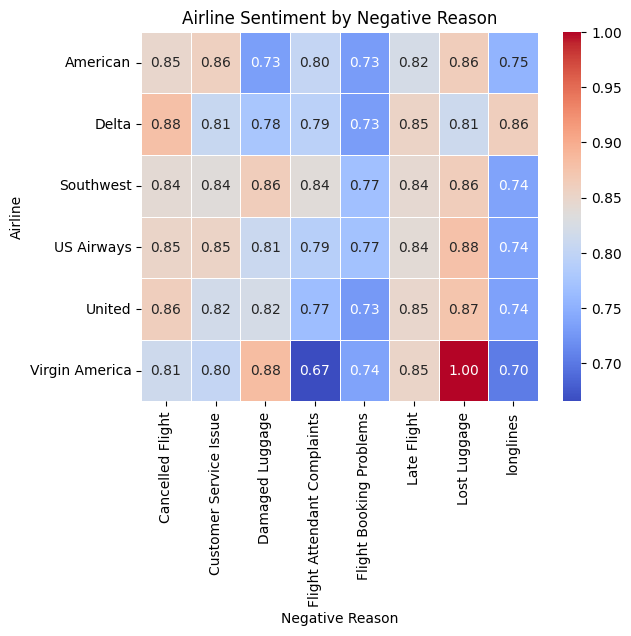

In [217]:
# create pivot table
pivot_table = tweetsDf.pivot_table(index='airline', columns='negativereason', values='negativereason_confidence')

# create heatmap
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)

# set plot title and axis labels
plt.title('Airline Sentiment by Negative Reason')
plt.xlabel('Negative Reason')
plt.ylabel('Airline')
plt.show()

# K-Means ALG has been choosen!

After using K-means clustering, we can use the cluster labels assigned to each data point to make predictions. For example, if we have a new data point and you want to predict which cluster it belongs to, we can use the K-means model to predict its cluster label based on its features.

Regarding our data, since we have already stripped out the positive and neutral sentiments and only have negative sentiments along with their reasons and confidence scores, we can use this data to perform K-means clustering. We can treat each negative reason as a feature, and each row in our data as a data point with a corresponding confidence score. We can then perform K-means clustering on this data to identify common negative reasons in the airline industry and their likelihood of occurring again based on the confidence scores.


c:\Users\Pat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


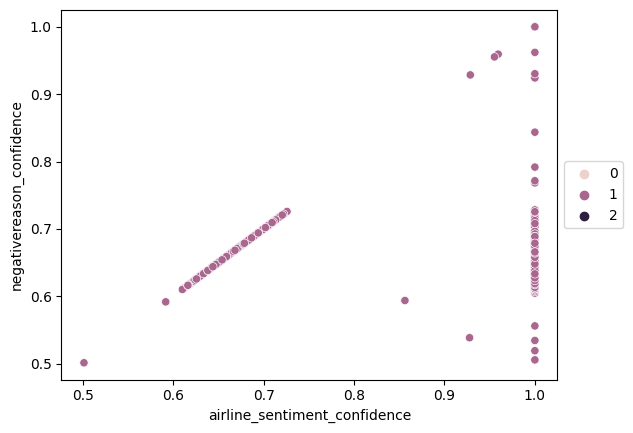

In [218]:
#Here is the revised code with comments added:

# Select columns for clustering
X = tweetsDf[['negativereason_confidence', 'airline_sentiment_confidence']]
# One-hot encode categorical variable
X = pd.get_dummies(X, columns=['negativereason_confidence'])

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

# Plot the clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Add cluster assignments to the dataframe
tweetsDf['cluster'] = kmeans.labels_

# Plot the clusters
sns.scatterplot(x='airline_sentiment_confidence', y='negativereason_confidence', hue='cluster', data=tweetsDf)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.show()

Agglomerative Clustering: This is a hierarchical clustering algorithm that iteratively merges the closest pairs of clusters until all the data is in one cluster.

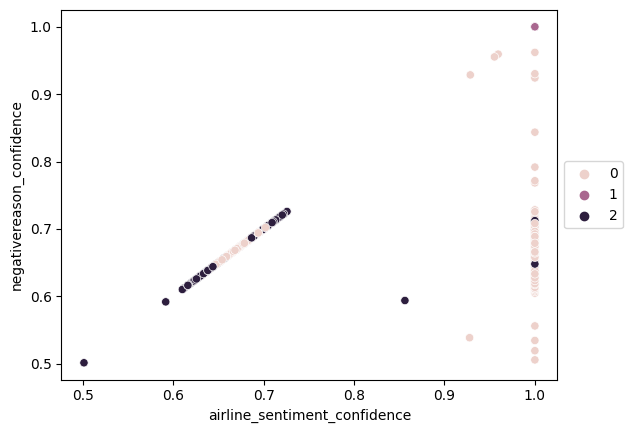

In [223]:
# Perform Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X_scaled)

# Add cluster assignments to the dataframe
tweetsDf['cluster'] = agg_clustering.labels_

# Plot the clusters
import seaborn as sns
sns.scatterplot(x='airline_sentiment_confidence', y='negativereason_confidence', hue='cluster', data=tweetsDf)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.show()

DBSCAN: This is a density-based clustering algorithm that groups together points that are in high-density regions and marks points in low-density regions as noise.

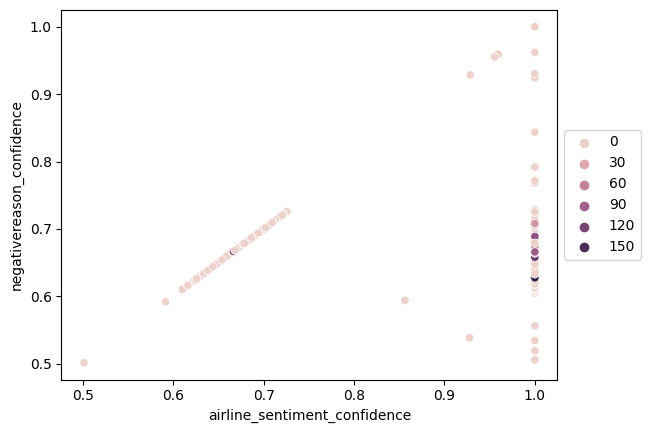

In [220]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

tweetsDf['cluster'] = dbscan.labels_
sns.scatterplot(x='airline_sentiment_confidence', y='negativereason_confidence', hue='cluster', data=tweetsDf)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.show()

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Convert the tweets into numerical features using CountVectorizer or TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(tweetsDf['negativereason'])
y = tweetsDf['airline_sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mnb.predict(X_test)

# Evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1240

    accuracy                           1.00      1240
   macro avg       1.00      1.00      1.00      1240
weighted avg       1.00      1.00      1.00      1240



The output you provided shows the performance of a classification model on a test dataset. The model achieved an accuracy of 1.0, meaning that it correctly predicted the class label for all instances in the test dataset.

The classification report provides more detailed information about the model’s performance. It shows the precision, recall, and f1-score for each class, as well as their averages. In this case, there is only one class, “negative”, so the averages are equal to the values for that class.

Precision is the ratio of true positive predictions to the total number of positive predictions. In this case, it is 1.0, meaning that all instances predicted as “negative” were actually negative.

Recall is the ratio of true positive predictions to the total number of positive instances. In this case, it is also 1.0, meaning that all negative instances were correctly predicted as such.

The f1-score is the harmonic mean of precision and recall. It provides a single measure of the balance between precision and recall. In this case, it is also 1.0, indicating a perfect balance.

The support column shows the number of instances in each class in the test dataset. In this case, there were 1240 negative instances..